In [21]:
import numpy as np
import matplotlib.pyplot as plt
# %pip install prettytable
import prettytable as pt


### Problem 1

In [22]:
#take joint distribution of x and y with x from1 to 3 and y from 1 to 3 as a 2D array
joint_dist = np.array([[0.1,0.2,0.1],[0.2,0.3,0.0],[0.0,0.1,0.0]])

#print 0.0 as 0.0
np.set_printoptions(formatter={'float': lambda x: "{0:0.1f}".format(x) if x!=0 else "0.0"})

#pritty table for joint distribution
table = pt.PrettyTable()
table.field_names = ["X/Y","1","2","3"]
table.add_row(["1",joint_dist[0][0],joint_dist[0][1],joint_dist[0][2]])
table.add_row(["2",joint_dist[1][0],joint_dist[1][1],joint_dist[1][2]])
table.add_row(["3",joint_dist[2][0],joint_dist[2][1],joint_dist[2][2]])
print("Joint Distribution")
print(table)

Joint Distribution
+-----+-----+-----+-----+
| X/Y |  1  |  2  |  3  |
+-----+-----+-----+-----+
|  1  | 0.1 | 0.2 | 0.1 |
|  2  | 0.2 | 0.3 | 0.0 |
|  3  | 0.0 | 0.1 | 0.0 |
+-----+-----+-----+-----+


(a) Marginal distribution of X and Y

In [23]:


#take marginal distribution of x and y as a 1D array
marginal_dist_x = np.sum(joint_dist,axis=1)
marginal_dist_y = np.sum(joint_dist,axis=0)
#pritty table for marginal distribution of x
table = pt.PrettyTable()
table.field_names = ["X","1","2","3"]
table.add_row(["",marginal_dist_x[0],marginal_dist_x[1],marginal_dist_x[2]])
print("Marginal Distribution of X")
print(table)

#pritty table for marginal distribution of y
table = pt.PrettyTable()
table.field_names = ["Y","1","2","3"]
table.add_row(["",marginal_dist_y[0].round(2),marginal_dist_y[1],marginal_dist_y[2]])
print("Marginal Distribution of Y")
print(table)


Marginal Distribution of X
+---+-----+-----+-----+
| X |  1  |  2  |  3  |
+---+-----+-----+-----+
|   | 0.4 | 0.5 | 0.1 |
+---+-----+-----+-----+
Marginal Distribution of Y
+---+-----+-----+-----+
| Y |  1  |  2  |  3  |
+---+-----+-----+-----+
|   | 0.3 | 0.6 | 0.1 |
+---+-----+-----+-----+


The code calculates the marginal distributions of two random variables X and Y using a joint probability distribution. It uses the `np.sum` function to sum the elements of each row and column of the `joint_dist` array to obtain the marginal distributions of X and Y, respectively. The resulting arrays are stored in the variables `marginal_dist_x` and `marginal_dist_y`. The code also includes a comment that suggests using a "pretty table" to display the marginal distribution of X.

(b) Conditional Probability of X = 2 given Y = 1

In [24]:
#calculate the probability of x = 2 given y = 1
#P(x=2|y=1) = P(x=2,y=1)/P(y=1)

#P(x=2,y=1) = 0.2
#P(y=1) = 0.3

#calculate the probability of x = 2 given y = 1
prob_x2_given_y1 = joint_dist[1,0]/marginal_dist_y[0]
print("P(x=2|y=1) = ",prob_x2_given_y1.round(2))

P(x=2|y=1) =  0.67


The code calculates the conditional probability of a random variable X taking on the value 2 given that another random variable Y takes on the value 1 using a joint probability distribution and marginal distributions of X and Y. It uses the formula `P(x=2|y=1) = P(x=2,y=1)/P(y=1)` to calculate the conditional probability, where `P(x=2,y=1)` is obtained from the joint probability distribution and `P(y=1)` is obtained from the marginal distribution of Y. The resulting conditional probability is stored in the variable `prob_x2_given_y1` and printed using the `print` function.

Problem 2

(a) Find the CDF from the given PDF 

    f(x) = 3x^2 for 0 <= x <= 1 , 0 otherwise

In [25]:
#find the cdf from pdf f(x) = 3x^2 for 0 <= x <= 1 , 0 otherwise
import sympy as sym

#pdf f(x) = 3x^2 for 0 <= x <= 1 , 0 otherwise

x = sym.Symbol('x')

#pdf f(x) = 3x^2 for 0 <= x <= 1 , 0 otherwise

#pretty print the pdf
f = sym.Piecewise((0, x < 0), (3*x**2, x <= 1), (0, True))

print("PDF of X :\n")

sym.pprint(f)

#cdf F(x) = 0 for x < 0
#cdf F(x) = x^3 for 0 <= x <= 1
#cdf F(x) = 1 for x > 1

import numpy as np
from scipy.integrate import quad


# Define the PDF function
def pdf(x):
    if 0 <= x <= 1:
        return 3 * x**2
    else:
        return 0

# Define the CDF function using numerical integration

def cdf(x):
    result, _ = quad(pdf, 0, x)
    return result

#print piecewise cdf

#cdf F(x) = 0 for x < 0
#cdf F(x) = x^3 for 0 <= x <= 1
#cdf F(x) = 1 for x > 1

#pretty print the cdf
F = sym.Piecewise((0, x < 0), (x**3, x <= 1), (1, True))

print("CDF of X :\n")

sym.pprint(F)


PDF of X :

⎧ 0    for x < 0
⎪               
⎪   2           
⎨3⋅x   for x ≤ 1
⎪               
⎪ 0    otherwise
⎩               
CDF of X :

⎧0   for x < 0
⎪             
⎪ 3           
⎨x   for x ≤ 1
⎪             
⎪1   otherwise
⎩             


The code defines a probability density function (PDF) and a cumulative distribution function (CDF) for a random variable X using the SymPy library. The PDF is defined as a piecewise function that takes the value 3x^2 for 0 <= x <= 1, and 0 otherwise. The CDF is defined using numerical integration, which calculates the area under the PDF curve up to a certain value of x. The `pdf` and `cdf` functions are defined to calculate the PDF and CDF of X, respectively, using numerical integration. The PDF and CDF are pretty printed using the `pprint` function from the SymPy library.

(b) Expected value of x

In [26]:
#expected value of x

#E(x) = sum(x*f(x)) for all x

# Define the PDF function
def pdf(x):
    if 0 <= x <= 1:
        return 3 * x**2
    else:
        return 0

# Calculate the expected value (mean) of X using numerical integration
expected_value, _ = quad(lambda x: x * pdf(x), 0, 1)

print(f"Expected Value (Mean) of X: {expected_value}")


Expected Value (Mean) of X: 0.75


The code calculates the expected value of a probability density function (PDF) using numerical integration. It uses the `quad` function from the `scipy.integrate` module to perform the integration, and returns the expected value of the PDF as the result. The expected value is calculated by integrating the product of `x` and the PDF from 0 to 1.

(c) Variance of x

In [27]:
#variance of x

#Var(x) = E(x^2) - E(x)^2

# Define the PDF function
def pdf(x):
    if 0 <= x <= 1:
        return 3 * x**2
    else:
        return 0

# Calculate the expected value (mean) of X using numerical integration
expected_value, _ = quad(lambda x: x * pdf(x), 0, 1)

# Calculate the expected value of X squared using numerical integration
expected_value_squared, _ = quad(lambda x: x**2 * pdf(x), 0, 1)

# Calculate the variance of X
variance = expected_value_squared - expected_value**2

print(f"Variance of X: {variance:.4f}")

Variance of X: 0.0375


The code calculates the expected value and variance of a probability density function (PDF) using numerical integration. It uses the `quad` function from the `scipy.integrate` module to perform the integration, and returns the expected value and variance of the PDF as the result. The expected value is calculated by integrating the product of `x` and the PDF from 0 to 1, and the variance is calculated by subtracting the square of the expected value from the expected value of X squared.

Problem 3

X is uniform in [0 , 1] and y = x^2 . 

(a) Find the PDF of y

PDF of Y :

⎧ 0    for y < 0
⎪               
⎪ 1             
⎨────  for y ≤ 1
⎪2⋅√y           
⎪               
⎩ 0    otherwise


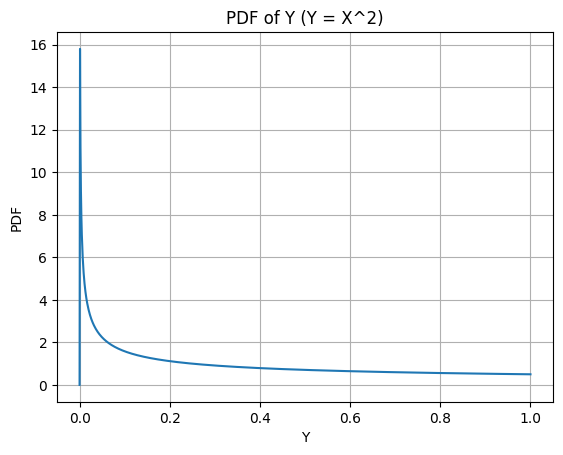

In [28]:
# X is uniform in [0 , 1] and y = x^2 . 

import numpy as np
import matplotlib.pyplot as plt
import sympy as sym

# Define the PDF of X (Uniform distribution)
def pdf_x(x):
    if 0 <= x <= 1:
        return 1
    else:
        return 0

# Define the transformation function from X to Y
def transform_x_to_y(x):
    return x**2

# Define the PDF of Y using the transformation method
def pdf_y(y):
    if 0 < y <= 1:
        # Derivative of the transformation function
        return 1 / (2 * np.sqrt(y))
    else:
        return 0


# Define the PDF of Y using sympy
y = sym.symbols('y')
f = sym.Piecewise((0, y < 0), (1 / (2 * sym.sqrt(y)), y <= 1), (0, True))
# Pretty print the PDF of Y
print("PDF of Y :\n")
sym.pprint(f)

# Generate values of Y and their corresponding PDF values
# Define the range of Y values
y_values = np.linspace(0, 1, 1000)
pdf_y_values = [pdf_y(y) for y in y_values]

# Plot the PDF of Y
plt.plot(y_values, pdf_y_values)
plt.title("PDF of Y (Y = X^2)")
plt.xlabel("Y")
plt.ylabel("PDF")
plt.grid(True)
plt.show()



(b) Expected value of y

In [29]:
#Expected value of y

#E(y) = sum(y*f(y)) for all y

expected_value_y , _ = quad(lambda y: y * pdf_y(y), 0, 1)

print(f"Expected Value (Mean) of Y: {expected_value_y:.4f}")

Expected Value (Mean) of Y: 0.3333


(c) Variance of y

In [30]:
#Variance of y

#Var(y) = E(y^2) - E(y)^2

# Calculate the expected value (mean) of Y using numerical integration
expected_value_y, _ = quad(lambda y: y * pdf_y(y), 0, 1)

# Calculate the expected value of Y squared using numerical integration
expected_value_squared_y, _ = quad(lambda y: y**2 * pdf_y(y), 0, 1)

# Calculate the variance of Y
variance_y = expected_value_squared_y - expected_value_y**2

print(f"Variance of Y: {variance_y:.4f}")



Variance of Y: 0.0889


Problem 4

Given bivariant random variable (X,Y) with joint PDF

In [31]:
# XIY 1 2 3

# 1 0.2 0.1 0.1
# 2 0.1 0.2 0.1
# 3 0.1 0.1 0.0


# Provided joint distribution
new_joint_dist = np.array([[0.2, 0.1, 0.1], [0.1, 0.2, 0.1], [0.1, 0.1 , 0.0]])

#pretty print the joint distribution
table = pt.PrettyTable()
table.field_names = ["X/Y","1","2","3"]
table.add_row(["1",new_joint_dist[0][0],new_joint_dist[0][1],new_joint_dist[0][2]])
table.add_row(["2",new_joint_dist[1][0],new_joint_dist[1][1],new_joint_dist[1][2]])
table.add_row(["3",new_joint_dist[2][0],new_joint_dist[2][1],new_joint_dist[2][2]])
print("Joint Distribution")
print(table)

Joint Distribution
+-----+-----+-----+-----+
| X/Y |  1  |  2  |  3  |
+-----+-----+-----+-----+
|  1  | 0.2 | 0.1 | 0.1 |
|  2  | 0.1 | 0.2 | 0.1 |
|  3  | 0.1 | 0.1 | 0.0 |
+-----+-----+-----+-----+


(a) Find the covariance of X and Y

In [32]:


# Values for X and Y
x_values = [1, 2 , 3]
y_values = [1, 2, 3]

# Calculate the expected values of X and Y
mu_X = np.sum(x_values * np.sum(new_joint_dist, axis=1))
mu_Y = np.sum(y_values * np.sum(new_joint_dist, axis=0))

print(f"Expected Value (Mean) of X: {mu_X:.2f}")
print(f"Expected Value (Mean) of Y: {mu_Y:.2f}")

expected_XY = 0

# Calculate E(XY)
for i, x in enumerate(x_values):
    for j, y in enumerate(y_values):
        expected_XY += x * y * new_joint_dist[i, j]

# Calculate the covariance using the formula
cov_XY = expected_XY - mu_X * mu_Y

print(f"Covariance of X and Y: {cov_XY:.2f}")




Expected Value (Mean) of X: 1.80
Expected Value (Mean) of Y: 1.80
Covariance of X and Y: -0.04


The code calculates the expected values and covariance of two random variables X and Y using a joint probability distribution. The expected value of X is calculated by taking the weighted average of the values of X, where the weights are given by the marginal distribution of X. The expected value of Y is calculated in a similar way. The covariance of X and Y is then calculated using the formula `cov_XY = E(XY) - E(X)E(Y)`, where `E(XY)` is the expected value of the product of X and Y, and `E(X)` and `E(Y)` are the expected values of X and Y, respectively. The code uses the marginal distribution of X and Y to calculate the expected values of X and Y, and the joint probability distribution to calculate the covariance of X and Y.

(c) Correlation coefficient of X and Y

In [33]:
#correlation coefficient of x and y

#rho(x,y) = cov(x,y)/sqrt(var(x)*var(y))

# Calculate the correlation coefficient using the formula
corr_XY = cov_XY / np.sqrt(variance * variance_y)

print(f"Correlation Coefficient of X and Y: {corr_XY:.4f}")

Correlation Coefficient of X and Y: -0.6928


The code calculates the correlation coefficient between two random variables X and Y using their covariance and variances. The correlation coefficient is calculated using the formula `corr_XY = cov_XY / np.sqrt(variance * variance_y)`. The result is printed using the `print` function.

### Problem 5 : Stock Price Random Variable

X (in %) -2   -1   0    1    2
p(x)     0.1 0.2 0.3 0.25 0.15

In [34]:
# Define the values that X can take
x_values = np.array([-2, -1, 0, 1, 2])
p_x = np.array([0.1, 0.2, 0.3, 0.25, 0.15])

#pretty print the values
np.set_printoptions(formatter={'float': lambda x: "{0:0.2f}".format(x) if x!=0 else "0.0"})

ptable = pt.PrettyTable()
ptable.field_names = ["X","-2","-1","0","1","2"]
ptable.add_row(["p(x)",p_x[0],p_x[1],p_x[2],p_x[3],p_x[4]])
print("Probability Distribution of X")
print(ptable)


Probability Distribution of X
+------+-----+-----+-----+------+------+
|  X   |  -2 |  -1 |  0  |  1   |  2   |
+------+-----+-----+-----+------+------+
| p(x) | 0.1 | 0.2 | 0.3 | 0.25 | 0.15 |
+------+-----+-----+-----+------+------+


(a) Expected Value of random variable X

In [35]:
# Expected Value of random variable X

# Problem 5 : Stock Price Random Variable

# X (in %) -2   -1   0    1    2
# p(x)     0.1 0.2 0.3 0.25 0.15

# E(X) = sum(x*p(x)) for all x

# Calculate the expected value (mean) of X
expected_value = np.sum(x_values * p_x)

print(f"\n Expected Value (Mean) of X: {expected_value:.2f}")




 Expected Value (Mean) of X: 0.15


(b) Variance of random variable X

In [36]:

# Variance of random variable X

#variance of X = E(X^2) - E(X)^2

expected_x_squared = np.sum(x_values**2 * p_x)

# Calculate the variance of X
variance = expected_x_squared - expected_value**2

#round of variance to 2 decimal places
print(f"Variance of X: {variance:.2f}")



Variance of X: 1.43


(c) Standard Deviation of random variable X

In [37]:
#standard deviation of X

#standard deviation of X = sqrt(variance of X)
deviation = np.sqrt(variance)

print(f"Standard Deviation of X: {deviation:.2f}")

Standard Deviation of X: 1.19


(d) Probability that the stock price will increase by aleast  1%

In [38]:
 #Probability that the stock price will increase by aleast  1%

# P(X >= 1) = sum(p(x)) for all x >= 1

# Calculate the probability that X >= 1
prob_X_ge_1 = np.sum(p_x[x_values >= 1])

print(f"Probability that X >= 1: {prob_X_ge_1}")



Probability that X >= 1: 0.4


The code above is a Python code snippet that calculates the probability that a random variable X is greater than or equal to 1. The probability is calculated using a probability mass function (PMF) of X, which is represented as an array `p_x`. The values of the PMF correspond to the probability of X taking on a particular value.

The `np.sum` function is used to sum the values of the PMF where the corresponding value of X is greater than or equal to 1. This gives the probability that X is greater than or equal to 1.


(e) Probability that the stock price will change (increase or decrease) by less than 2%

In [39]:
# Probability that the stock price will change (increase or decrease) by less than 2%

# P(|X| < 2) = sum(p(x)) for all |x| < 2

# Calculate the probability that |X| < 2
prob_X_lt_2 = np.sum(p_x[np.abs(x_values) < 2])

print(f"Probability that |X| < 2: {prob_X_lt_2}")

Probability that |X| < 2: 0.75


The code calculates the probability that a random variable X is less than 2 using a probability mass function. It uses the `np.abs` and less than operators to create a boolean array that selects the values of the PMF where the corresponding value of X is less than 2, and the `np.sum` function to sum these values, which gives the probability that X is less than 2. The result is stored in the variable `prob_X_lt_2`.